In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# 找到ROI轮廓的顶点

## 多边形近似

# 绘制边缘

OpenCV提供的绘制函数中，有一些共同的参数：
- img : The image where you want to draw the shapes
- color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
- thickness : Thickness of the line or circle etc. If `-1` is passed for closed figures like circles, it will **fill the shape**. default thickness = 1
- lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv.LINE_AA gives anti-aliased line which looks great for curves.

In [4]:
# Create a black image
image = np.zeros((512,512,3), np.uint8)

## 线段

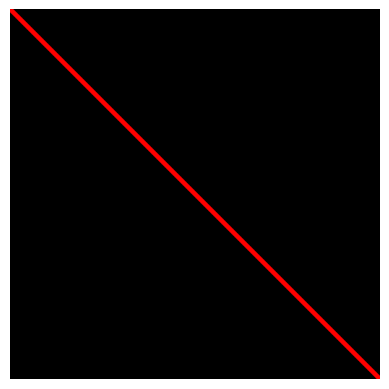

In [18]:
img = image.copy()

# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)

# 使用matplotlib显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

## 矩形

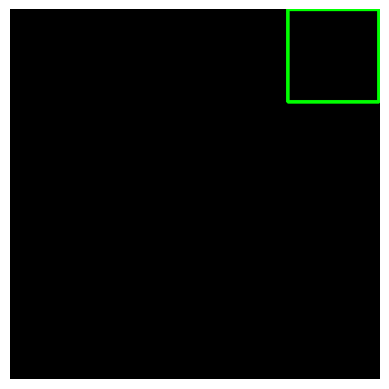

In [8]:
img = image.copy()

# 输入矩形左上角和右下角的顶点坐标
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# 使用matplotlib显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

## 圆形

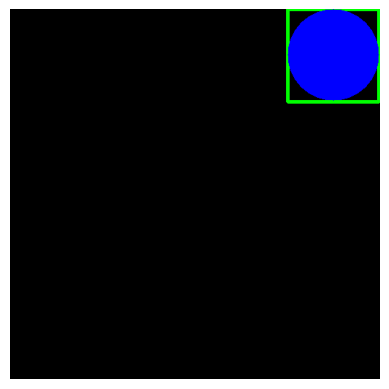

In [9]:
# To draw a circle, you need its center coordinates and radius. 
# We will draw a circle inside the rectangle drawn above.
cv2.circle(img,(447,63), 63, (0,0,255), -1)

# 使用matplotlib显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

## 多边形

To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32.

If third argument is False, you will get a polylines joining all the points, not a closed shape.

`cv.polylines()` can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually. It is a much better and faster way to draw a group of lines than calling `cv.line()` for each line.

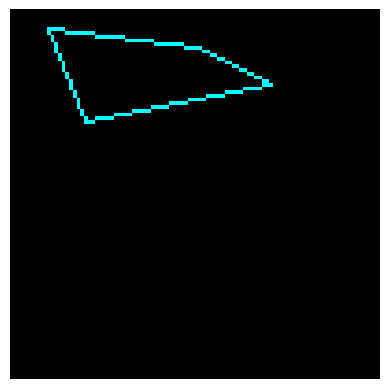

In [14]:
img = np.zeros((100,100,3), np.uint8)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))

# 注意pts需要用方括号[]框住
cv2.polylines(img,[pts],True,(0,255,255))

# 使用matplotlib显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

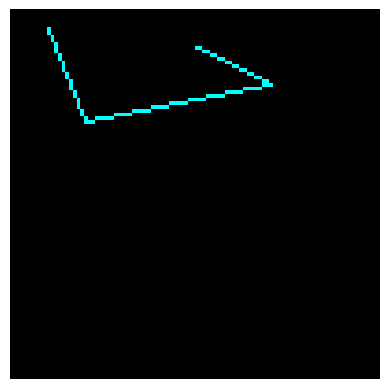

In [15]:
img = np.zeros((100,100,3), np.uint8)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))

# 注意pts需要用方括号[]框住
cv2.polylines(img,[pts],False,(0,255,255))

# 使用matplotlib显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

## Counter

cv2.drawContours(image, [contours], contourIdx, color, thickness, lineType, hierarchy, maxLevel, offset)

- image: 要绘制轮廓的目标图像。这是一个多通道或单通道图像，通常是彩色图像（BGR）。
- contours: 轮廓数据，是一个 Python 列表，包含所有轮廓的点集。每个轮廓本身也是一个点集，可以由 `cv2.findContours()` 函数获得。
- contourIdx: 指定要绘制的轮廓的索引。如果是负值，则绘制所有轮廓。
- color: 轮廓线条的颜色。对于彩色图像，使用 (B, G, R) 格式，例如 (0, 255, 0) 表示绿色。
- thickness: 轮廓线条的厚度。如果为负值（如 cv2.FILLED），则填充轮廓内部。
- lineType: 线条的类型，有 8（8-connected line）、4（4-connected line）和 cv2.LINE_AA（抗锯齿线）可选。
- hierarchy（可选）: 轮廓层次结构，通常由 `cv2.findContours()` 返回。如果提供，该参数将用于绘制轮廓的层次结构。
- maxLevel（可选）: 用于绘制轮廓层次结构的最大层次。默认值为 0，表示只绘制当前层次的轮廓。如果为负值，则绘制所有层次的轮廓。
- offset（可选）: 轮廓点坐标的偏移量。默认值为 (0, 0)。

# 添加文字

- Text data that you want to write
- Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
- Font type (Check `cv2.putText()` docs for supported fonts)
- Font Scale (specifies the size of font)
- regular things like color, thickness, lineType etc. For better look, lineType = cv.LINE_AA is recommended.

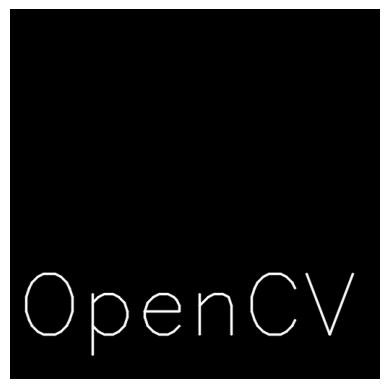

In [17]:
img = image.copy()

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,450), font, 4,(255,255,255),2,cv2.LINE_AA)

# 使用matplotlib显示图像
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()